<a href="https://colab.research.google.com/github/usUpal/plant-disease-detection/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

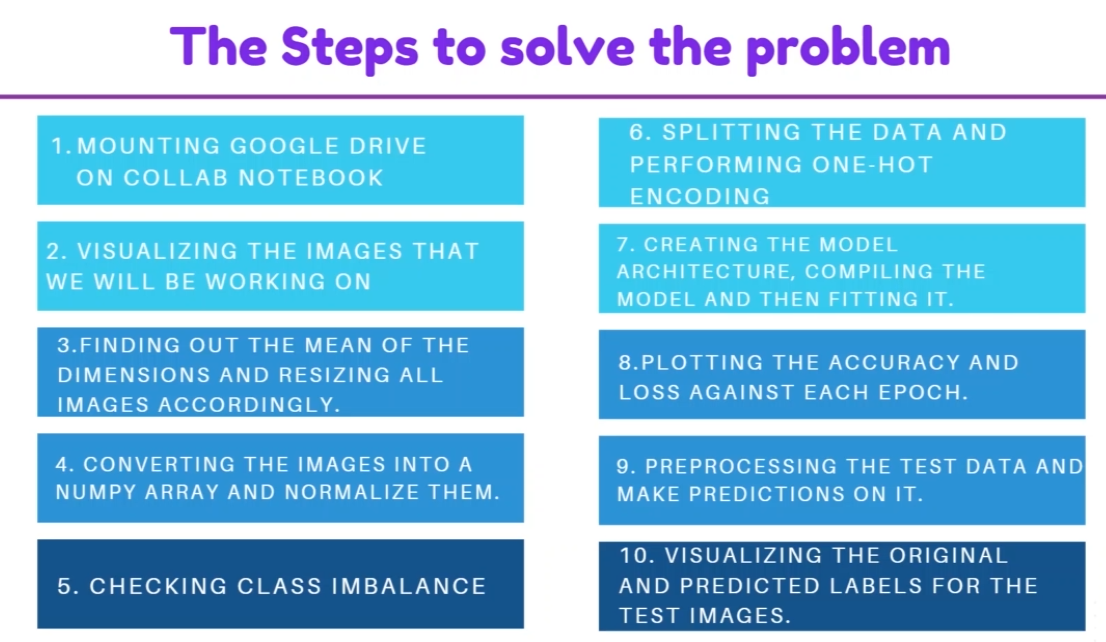

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os

from os import listdir
from PIL import Image

from sklearn.preprocessing import label_binarize, LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split
from keras.models import model_from_json
from tensorflow.keras.utils import to_categorical


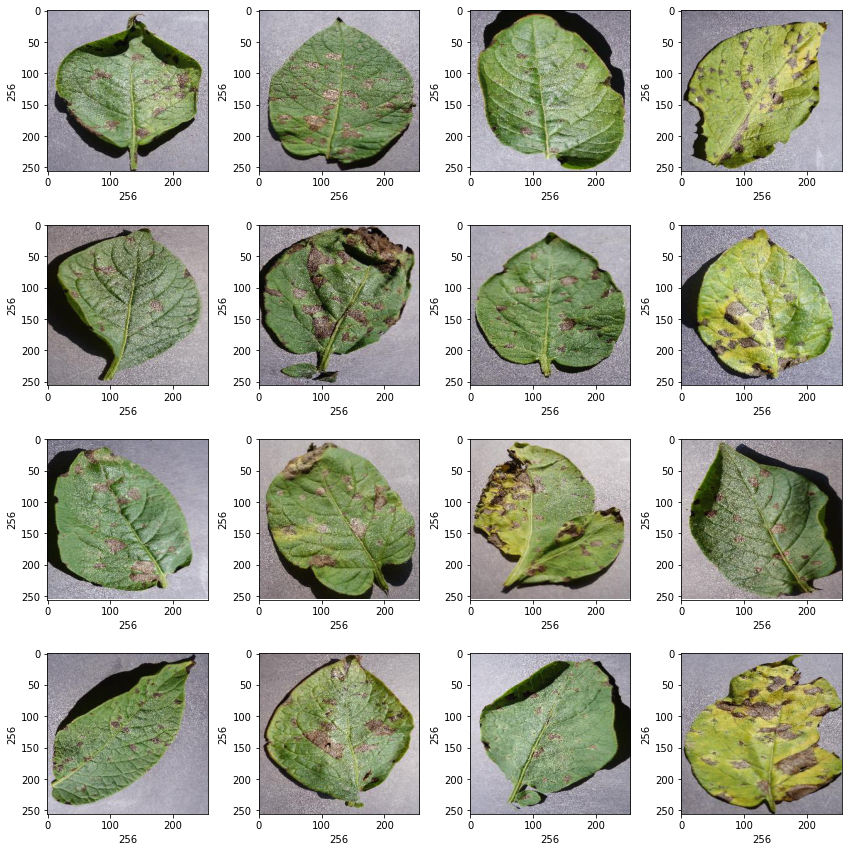

In [3]:
# plotting 2 images to check the dataset
plt.figure(figsize=(12,12))
path = '/content/drive/MyDrive/datasets/Data/Plant_images_pianalytix/Potato___Early_blight'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize = 10) #width
  plt.ylabel(rand_img.shape[0], fontsize = 10) #height

In [4]:
# converting image into array
def convert(img_dir):
  try:
    image = cv2.imread(img_dir)
    if image is not None:
      image = cv2.resize(image, (256,256))
      return img_to_array(image)
    else:
      return np.array([])
  except Exception as e:
    print(f'Error: {e}')
    

    


In [6]:
print(directory)

NameError: ignored

In [12]:
dir = '/content/drive/MyDrive/datasets/Data/Plant_images_pianalytix'
root_dir = listdir(dir)
image_list, label_list = [], []
all_labels = ['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']
binary_labels = [0,1,2]
temp = -1

# reading and converting image into numpy array
for i in root_dir:
  plant_list = listdir(f'{dir}/{i}')
  temp += 1
  for j in plant_list:
    img_path = f'{dir}/{i}/{j}'
    image_list.append(convert(img_path))
    label_list.append(binary_labels[temp])

In [13]:
# visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

2    301
1    301
0    301
dtype: int64

In [14]:
image_list[0].shape

(256, 256, 3)

In [15]:
label_list = np.array(label_list)
label_list.shape

(903,)

In [22]:
# split dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size = 0.2, random_state = 42)

In [20]:
print(x_train)

[array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32), array([[[120., 118., 124.],
        [125., 123., 129.],
        [134., 132., 138.],
    

In [39]:
# # Normalize the dataset
x_train = np.array(arr.tolist(x_train))/225.0



x_test = np.array(arr.tolist(x_test))/225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)


NameError: ignored

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same",input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(16, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(3, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28224)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 225800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                

In [35]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001),metrics=['accuracy'])

In [36]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [37]:
# Training the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, 
                    validation_data = (x_val, y_val))

ValueError: ignored